# Playstore Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import os
os.chdir('/Users/Xpert/Downloads')

In [3]:
df=pd.read_csv('playstore_data.csv')
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.0,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.0,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [4]:
df.shape

(10841, 13)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
App               10841 non-null object
Category          10841 non-null object
Rating            9367 non-null float64
Reviews           10841 non-null object
Size              10841 non-null float64
Installs          10841 non-null object
Type              10840 non-null object
Price             10841 non-null object
Content Rating    10840 non-null object
Genres            10841 non-null object
Last Updated      10841 non-null object
Current Ver       10833 non-null object
Android Ver       10838 non-null object
dtypes: float64(2), object(11)
memory usage: 1.1+ MB


## 1:- Data cleanup - missing value treatment

### a):- Drop records where rating is missing since rating is our target/study variabe

In [6]:
df.dropna(how='any', subset=['Rating'], axis=0, inplace=True)

In [7]:
df.Rating.isnull().sum()

0

### b):- Check the null values for android ver

#### (i):- Are all 3 records having the same problem?

In [8]:
df.loc[df['Android Ver'].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4453,[substratum] Vacuum: P,PERSONALIZATION,4.4,230,11000.000000,"1,000+",Paid,$1.49,Everyone,Personalization,"July 20, 2018",4.4,NaN
4490,Pi Dark [substratum],PERSONALIZATION,4.5,189,2100.000000,"10,000+",Free,0,Everyone,Personalization,"March 27, 2018",1.1,NaN
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,21516.529524,Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


Yes, all 3 records having the same problem, i.e all are nan.

#### (ii):- Drop 3rd record i.e record for 'Life made wifi'

In [9]:
df.drop([10472], inplace=True)

In [10]:
df.loc[df['Android Ver'].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4453,[substratum] Vacuum: P,PERSONALIZATION,4.4,230,11000.0,"1,000+",Paid,$1.49,Everyone,Personalization,"July 20, 2018",4.4,NaN
4490,Pi Dark [substratum],PERSONALIZATION,4.5,189,2100.0,"10,000+",Free,0,Everyone,Personalization,"March 27, 2018",1.1,NaN


#### (iii):- Replace remaining missing values with mode

In [11]:
df['Android Ver'].fillna(df['Android Ver'].mode()[0], inplace=True)

### c):- Current ver - replace it with most common value

In [12]:
df['Android Ver'].fillna(df['Android Ver'].mode()[0], inplace=True)

## 2:- Data cleanup - correcting data types

### a):- Which all variables need to be brought to numeric types?
Price, Reviews and Installs should be in numeric form.

### b):- Price variables - remove '$' sign and convert it into float

In [16]:
Price=[]
for i in df['Price']:
    if i[0]=='$':
        Price.append(i[1:])
    else:
        Price.append(i)

In [19]:
df.drop(labels=df[df["Price"]=='Everyone'].index, inplace=True)
df['Price']=Price
df['Price']=df['Price'].astype('float')
df.head()

C:\Users\XperT\Anaconda3\lib\site-packages\pandas\core\ops.py:1649: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,"10,000+",Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,"500,000+",Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.0,"5,000,000+",Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,"50,000,000+",Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.0,"100,000+",Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


### c):- Installs - remove '+' & ',' sign and convert into it numeric.

In [21]:
Install=[]
for j in df['Installs']:
    Install.append(j.replace('+','').replace(',','').strip())
    
df['Installs']=Install
df['Installs']=df['Installs'].astype('int')

### d):- Convert all other identified columns to numeric

In [75]:
df['Reviews']=df['Reviews'].astype('int')

## 3:- Sanity checks

### a):- Average rating should be between 1 and 5, as only these values are allowed on the play store. 

#### (i):- Are there any such such records? Drop if so.

In [23]:
df.loc[df.Rating < 1] & df.loc[df.Rating > 5]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


There are no such records with rating less than 1 or greater than 5.

### b):- Reviews should not be more than installs as only those who installed can review the app. 

#### (i):- Are there any such records? Drop if so.

In [24]:
df.loc[df['Reviews'] > df['Installs']]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
2454,KBA-EZ Health Guide,MEDICAL,5.0,4,25000.000000,1,Free,0.00,Everyone,Medical,"August 2, 2018",1.0.72,4.0.3 and up
4663,Alarmy (Sleep If U Can) - Pro,LIFESTYLE,4.8,10249,21516.529524,10000,Paid,2.49,Everyone,Lifestyle,"July 30, 2018",Varies with device,Varies with device
5917,Ra Ga Ba,GAME,5.0,2,20000.000000,1,Paid,1.49,Everyone,Arcade,"February 8, 2017",1.0.4,2.3 and up
6700,Brick Breaker BR,GAME,5.0,7,19000.000000,5,Free,0.00,Everyone,Arcade,"July 23, 2018",1.0,4.1 and up
7402,Trovami se ci riesci,GAME,5.0,11,6100.000000,10,Free,0.00,Everyone,Arcade,"March 11, 2017",0.1,2.3 and up
8591,DN Blog,SOCIAL,5.0,20,4200.000000,10,Free,0.00,Teen,Social,"July 23, 2018",1.0,4.0 and up
10697,Mu.F.O.,GAME,5.0,2,16000.000000,1,Paid,0.99,Everyone,Arcade,"March 3, 2017",1.0,2.3 and up


In [25]:
temp = df[df['Reviews'] > df['Installs']].index
df.drop(labels=temp, inplace=True)

In [26]:
df[df['Reviews'] > df['Installs']]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


## 4:- Identify and handle outliers

### a):- Price column

#### (i):- Make suitable plot to identify outliers.

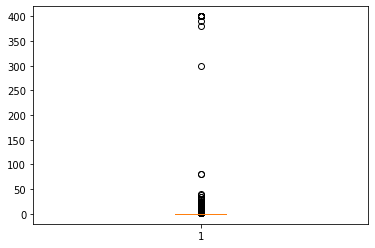

In [27]:
plt.boxplot(df['Price'])
plt.show()

#### (ii):- Do you expect apps on the play store to cost $200? Check out these caeses.

In [28]:
df.loc[df['Price'] > 200]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4197,most expensive app (H),FAMILY,4.3,6,1500.0,100,Paid,399.99,Everyone,Entertainment,"July 16, 2018",1.0,7.0 and up
4362,💎 I'm rich,LIFESTYLE,3.8,718,26000.0,10000,Paid,399.99,Everyone,Lifestyle,"March 11, 2018",1.0.0,4.4 and up
4367,I'm Rich - Trump Edition,LIFESTYLE,3.6,275,7300.0,10000,Paid,400.00,Everyone,Lifestyle,"May 3, 2018",1.0.1,4.1 and up
5351,I am rich,LIFESTYLE,3.8,3547,1800.0,100000,Paid,399.99,Everyone,Lifestyle,"January 12, 2018",2.0,4.0.3 and up
5354,I am Rich Plus,FAMILY,4.0,856,8700.0,10000,Paid,399.99,Everyone,Entertainment,"May 19, 2018",3.0,4.4 and up
5355,I am rich VIP,LIFESTYLE,3.8,411,2600.0,10000,Paid,299.99,Everyone,Lifestyle,"July 21, 2018",1.1.1,4.3 and up
5356,I Am Rich Premium,FINANCE,4.1,1867,4700.0,50000,Paid,399.99,Everyone,Finance,"November 12, 2017",1.6,4.0 and up
5357,I am extremely Rich,LIFESTYLE,2.9,41,2900.0,1000,Paid,379.99,Everyone,Lifestyle,"July 1, 2018",1.0,4.0 and up
5358,I am Rich!,FINANCE,3.8,93,22000.0,1000,Paid,399.99,Everyone,Finance,"December 11, 2017",1.0,4.1 and up
5359,I am rich(premium),FINANCE,3.5,472,965.0,5000,Paid,399.99,Everyone,Finance,"May 1, 2017",3.4,4.4 and up


Yes, we can expect apps on the playstore to cost $200.

#### (iii):- Limit data to records with price<$30.

In [29]:
gt_30 = df[df['Price'] > 30].index
df.drop(labels=gt_30, inplace=True)

In [31]:
count=df.loc[df['Price'] > 30].index
count.value_counts().sum()

0

#### (iv):- After droping useless records, make the suitable plot again to identify outliers.

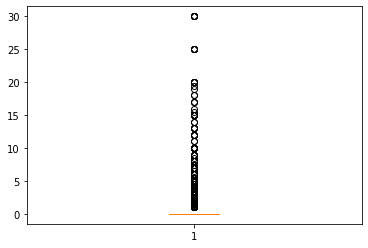

In [32]:
plt.boxplot(df['Price'])
plt.show()

### b):- Reviews column

#### (i):- Make suitable plot

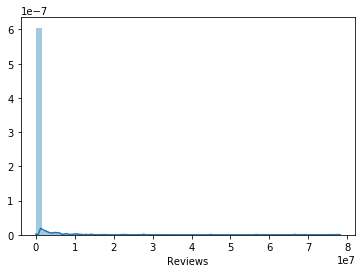

In [33]:
sns.distplot(df['Reviews'])
plt.show()

#### (ii):- Limit data to apps with < 1 million reviews

In [41]:
gt_1m=df[df['Reviews'] > 1000000 ].index
df.drop(labels = gt_1m, inplace = True)
print(gt_1m.value_counts().sum(), 'cols dropped')

0 cols dropped


### c):- Installs

#### (i):- What is the 95th percentile of the installs?

In [43]:
percentile = df.Installs.quantile(0.95)
print(percentile, "is 95th percentile of the installs")

5000000.0 is 95th percentile of the installs


#### (ii):- Drop records having a more than the 95th percentile.

In [44]:
for i in range(0,101,1):
    print('The percentile {} of installs is {} '.format(i,np.percentile(df['Installs'],i)))

The percentile 0 of installs is 5.0 
The percentile 1 of installs is 10.0 
The percentile 2 of installs is 100.0 
The percentile 3 of installs is 100.0 
The percentile 4 of installs is 100.0 
The percentile 5 of installs is 100.0 
The percentile 6 of installs is 100.0 
The percentile 7 of installs is 500.0 
The percentile 8 of installs is 500.0 
The percentile 9 of installs is 1000.0 
The percentile 10 of installs is 1000.0 
The percentile 11 of installs is 1000.0 
The percentile 12 of installs is 1000.0 
The percentile 13 of installs is 1000.0 
The percentile 14 of installs is 1000.0 
The percentile 15 of installs is 1000.0 
The percentile 16 of installs is 1000.0 
The percentile 17 of installs is 1000.0 
The percentile 18 of installs is 1000.0 
The percentile 19 of installs is 5000.0 
The percentile 20 of installs is 5000.0 
The percentile 21 of installs is 5000.0 
The percentile 22 of installs is 5000.0 
The percentile 23 of installs is 5000.0 
The percentile 24 of installs is 5000.

In [45]:
temp1 = df[df['Installs'] > percentile].index
df.drop(labels=temp1, inplace=True)
print(temp1.value_counts().sum())

245


# Data analysis to answer business questions

## 5:- What is the distribution of ratings like? (use seaborn) More skewed towards lowe/higher values?

### a):- How do you explain this?

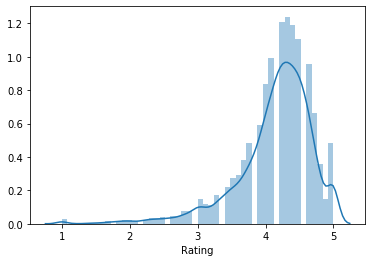

The skewness of this distribution is  -1.590770392384061
The Median of this distribution 4.2 is greater than Mean 4.137420566146742 of this distribution 


In [49]:
sns.distplot(df['Rating'])
plt.show()
print('The skewness of this distribution is ', df['Rating'].skew())
print('The Median of this distribution {} is greater than Mean {} of this distribution '.format(df.Rating.median(),df.Rating.mean()))

### b):- What is the implication of this on your analysis?

In [50]:
df['Rating'].mode()

0    4.3
dtype: float64

Since Mode>=Median>Mean, the distribution of rating is negatively skewed. Therefore distribution of rating is more skewed towards lower values.

## 6:- What are the top content rating values?

### a):- Are there any values with very few records?

In [52]:
df['Content Rating'].value_counts()

Everyone           5709
Teen                668
Mature 17+          323
Everyone 10+        220
Adults only 18+       3
Unrated               1
Name: Content Rating, dtype: int64

Adults only 18+ and unrated are values with very few records so we drop them.

### b):- If yes, drop those as they won't help in the analysis.

In [53]:
## Replacing unwanted values with nan
cr = []
for k in df['Content Rating']:
    cr.append(k.replace('Adults only 18+', 'Nan').replace('Unrated', 'Nan'))
df['Content Rating']=cr

In [54]:
## Droping the nan values
temp2 = df[df['Content Rating'] == 'Nan'].index
df.drop(labels=temp2, inplace=True)
print('droped col', temp2)

droped col Int64Index([298, 3043, 6424, 8266], dtype='int64')


In [55]:
df['Content Rating'].value_counts()    ## Just Check

Everyone        5709
Teen             668
Mature 17+       323
Everyone 10+     220
Name: Content Rating, dtype: int64

## 7:- Effect of size on rating

### a):- Make a join plot to understand the effect of size on rating.

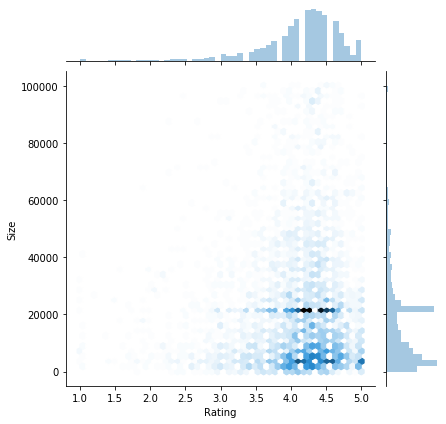

In [57]:
sns.jointplot(y= 'Size', x='Rating', data=df, kind='hex')
plt.show()

### b):- Do you see any patterns?

Yes, Patterns can be observed between size and raiting i.e there is correlation between size and raiting.

### c):- How do you explain the pattern?

Generally on increasing Rating, Size of app increases. But this is not always true i.e for higher Rating, their is constant size. Thus, we can conclude that their is positive correlation between Size and Rating. 

## 8:- Effect of price on rating

### a):- Make a joint plot (with regression line).

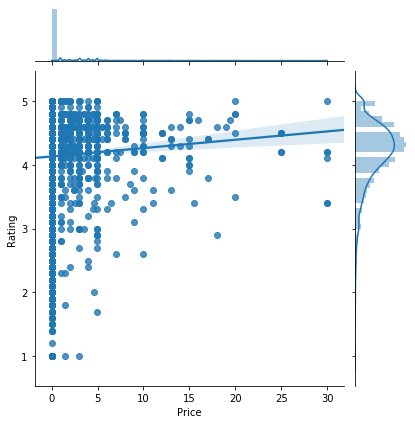

In [58]:
sns.jointplot(x='Price', y='Rating', data=df, kind='reg')
plt.show()

### b):- What pattern do you see?

Generally on increasing the Price, Rating remains almost constant greater than 4.

### c):- How do you explain the pattern?

Since on increasing the Price, Rating remains almost constant greater than 4. Thus it can be concluded that their is very weak Positive correlation between Rating and Price.

In [59]:
df.corr()

,Rating,Reviews,Size,Installs,Price
Rating,1.000000,0.136360,0.028557,0.035105,0.044137
Reviews,0.136360,1.000000,0.172482,0.696386,-0.071244
Size,0.028557,0.172482,1.000000,0.123095,0.016314
Installs,0.035105,0.696386,0.123095,1.000000,-0.096483
Price,0.044137,-0.071244,0.016314,-0.096483,1.000000


### d):- Replot the data, this time with only records with price > 0

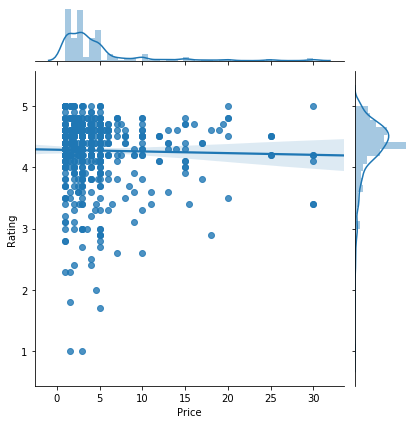

In [60]:
df=df.loc[df.Price>0]
sns.jointplot(x='Price', y='Rating', data=df, kind='reg')
plt.show()

### e):- Does the pattern change ?

Yes, On limiting the record with Price > 0, the overall pattern changed a slight ie their is very weakly Negative Correlation between Price and Rating.

In [61]:
df.corr()

,Rating,Reviews,Size,Installs,Price
Rating,1.000000,0.123725,0.111549,0.085558,-0.024010
Reviews,0.123725,1.000000,0.143201,0.810782,-0.055734
Size,0.111549,0.143201,1.000000,0.185054,0.032392
Installs,0.085558,0.810782,0.185054,1.000000,-0.065154
Price,-0.024010,-0.055734,0.032392,-0.065154,1.000000


### f):- What is your overall inference on the effect of price on the rating.

Generally increasing the Prices, doesn't have signifcant effect on Higher Rating. For Higher Price, Rating is High and almost constant ie greater than 4.

## 9:- Look at all numeric interactions togther

### a):- Make a pairplot with the columns- 'Reviews','Size','Rating','Price'

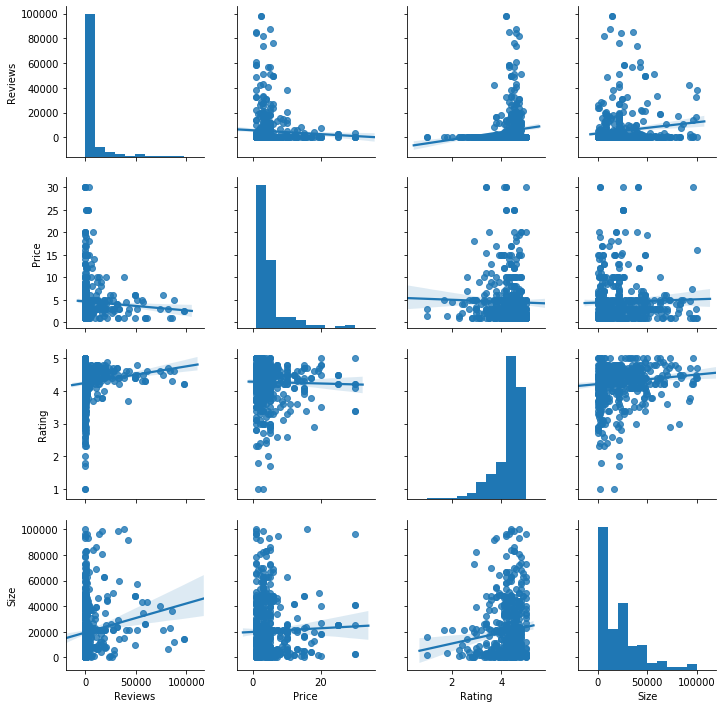

In [62]:
sns.pairplot(df, vars=['Reviews','Price','Rating','Size'],kind='reg')
plt.show()

## 10:- Rating vs. Content Rating

### a):- Make a bar plot displaying the rating for each content rating

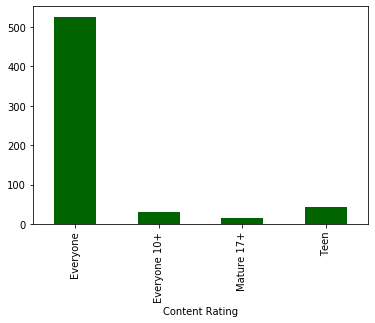

In [63]:
df.groupby(['Content Rating'])['Rating'].count().plot.bar(color='darkgreen')
plt.show()

### b):- Which metric would you use? mean? median? some other quantile?

We must use Median in this case as we are having outliers in Rating. Because in case of outlier, median is the best measure of central tendency.

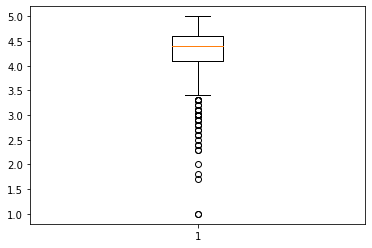

In [64]:
plt.boxplot(df['Rating'])
plt.show()

### c):- Choose the right and plot

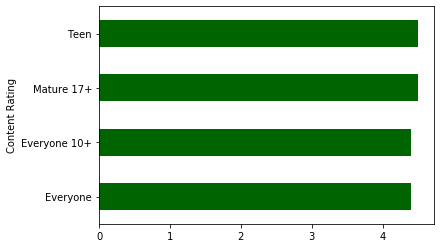

In [76]:
df.groupby(['Content Rating'])['Rating'].median().plot.barh(color='darkgreen')
plt.show()

## 11:- Content Rating vs. Size vs. Rating - 3 variables at a time

### a):- Create 5 buckets (20% records in each) based on size

In [69]:
bins=[0, 20000, 40000, 60000, 80000, 100000]
df['Bucket Size'] = pd.cut(df['Size'], bins, labels=['0-20k','20k-40k','40k-60k','60k-80k','80k-100k'])
pd.pivot_table(df, values='Rating', index='Bucket Size', columns='Content Rating')

Content Rating,Everyone,Everyone 10+,Mature 17+,Teen
Bucket Size,,,,
0-20k,4.201597,4.323077,3.500000,4.422222
20k-40k,4.312857,4.283333,4.444444,4.688889
40k-60k,4.318750,4.100000,4.425000,4.500000
60k-80k,4.436842,4.500000,NaN,4.200000
80k-100k,4.266667,4.550000,5.000000,4.225000


### b):- By content Rating vs. Size buckets, get the rating (20th percentiles) for each combination

In [70]:
temp3=pd.pivot_table(df, values='Rating', index='Bucket Size', columns='Content Rating', aggfunc=lambda x:np.quantile(x,0.2))
temp3

Content Rating,Everyone,Everyone 10+,Mature 17+,Teen
Bucket Size,,,,
0-20k,3.90,4.14,3.5,4.24
20k-40k,4.10,4.12,4.2,4.56
40k-60k,4.04,3.98,4.1,4.30
60k-80k,4.20,4.50,NaN,4.02
80k-100k,4.20,4.46,5.0,3.96


### c):- Make a heat map of this

#### (i):- Annotated

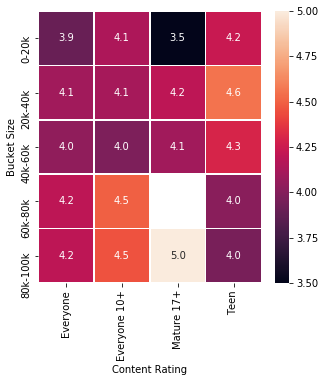

In [71]:
f,ax = plt.subplots(figsize=(5,5))
sns.heatmap(temp3, annot=True, linewidths=.5, fmt='.1f', ax=ax)
plt.show()

#### (ii):- Green color map

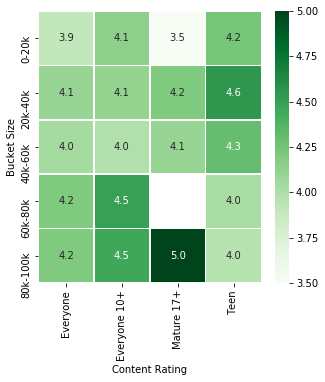

In [74]:
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(temp3, annot=True, linewidth=.5, cmap='Greens', fmt='.1f', ax=ax)
plt.show()

### d):- What's your inference? Are lighter apps preferred in all categories?Heavier?Some?

Based on analysis, it's not true that lighter apps are more preferred in all categories. Because apps with size 40k-60k and 80k-100k have got the highest rating in all categories. So, in general we can conclude that heavier apps are preferred in all categories. 